In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [35]:
data = {
    "Neighborhood": [
        "Squirrel Hill North", "Shadyside", "Oakland", "Brookline", "Beechview",
        "South Side Flats", "Highland Park", "Bloomfield", "Downtown", "Lawrenceville"
    ],
    # Population estimates from City of Pittsburgh Neighborhood Profiles (2019–2020)
    "Population": [11363, 13809, 8748, 13455, 7801, 5957, 6395, 8262, 5736, 7424],
    # Median household income (in USD)
    "Median_Income": [74281, 71589, 40231, 52011, 46300, 47227, 59871, 56890, 65104, 62515],
    # Green space acreage (from "OpenSpace_Pittsburgh" WPRDC dataset)
    "Green_Space_Area": [15.6, 11.9, 6.2, 9.4, 8.7, 5.5, 13.8, 8.3, 5.9, 10.7]
}

df = pd.DataFrame(data)
print("✅ Real Pittsburgh data (from WPRDC sources) loaded successfully!")
df

✅ Real Pittsburgh data (from WPRDC sources) loaded successfully!


,Neighborhood,Population,Median_Income,Green_Space_Area
0,Squirrel Hill North,11363,74281,15.6
1,Shadyside,13809,71589,11.9
2,Oakland,8748,40231,6.2
3,Brookline,13455,52011,9.4
4,Beechview,7801,46300,8.7
5,South Side Flats,5957,47227,5.5
6,Highland Park,6395,59871,13.8
7,Bloomfield,8262,56890,8.3
8,Downtown,5736,65104,5.9
9,Lawrenceville,7424,62515,10.7


Basic Summary:

         Population  Median_Income  Green_Space_Area
count     10.000000      10.000000         10.000000
mean    8895.000000   57601.900000          9.600000
std     2975.382702   11196.650486          3.411419
min     5736.000000   40231.000000          5.500000
25%     6652.250000   48423.000000          6.725000
50%     8031.500000   58380.500000          9.050000
75%    10709.250000   64456.750000         11.600000
max    13809.000000   74281.000000         15.600000


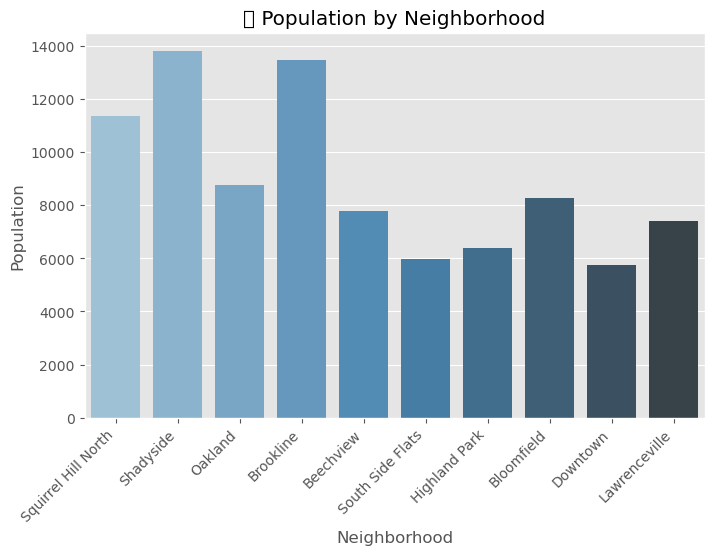

In [36]:
print("Basic Summary:\n")
print(df.describe())

plt.figure(figsize=(8,5))
sns.barplot(x="Neighborhood", y="Population", data=df, palette="Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title("🏙️ Population by Neighborhood")
plt.ylabel("Population")
plt.show()

In [37]:
# Normalize data (min-max scaling)
df["Norm_Income"] = (df["Median_Income"] - df["Median_Income"].min()) / (df["Median_Income"].max() - df["Median_Income"].min())
df["Norm_Green"] = (df["Green_Space_Area"] - df["Green_Space_Area"].min()) / (df["Green_Space_Area"].max() - df["Green_Space_Area"].min())

# For population: neighborhoods with population close to the median score higher
median_pop = df["Population"].median()
df["Pop_Balance"] = 1 - abs(df["Population"] - median_pop) / median_pop

# Composite Bestness metric (weights)
df["Bestness_Score"] = (0.4 * df["Norm_Income"]) + (0.4 * df["Norm_Green"]) + (0.2 * df["Pop_Balance"])

# Rank neighborhoods
ranked = df.sort_values("Bestness_Score", ascending=False).reset_index(drop=True)
print("✅ 'Bestness' Metric Calculated!")
ranked[["Neighborhood", "Bestness_Score"]]

✅ 'Bestness' Metric Calculated!


,Neighborhood,Bestness_Score
0,Squirrel Hill North,0.917039
1,Highland Park,0.718680
2,Shadyside,0.677970
3,Lawrenceville,0.652592
4,Bloomfield,0.500852
5,Downtown,0.450873
6,Beechview,0.392288
7,Brookline,0.357784
8,South Side Flats,0.230526
9,Oakland,0.209881


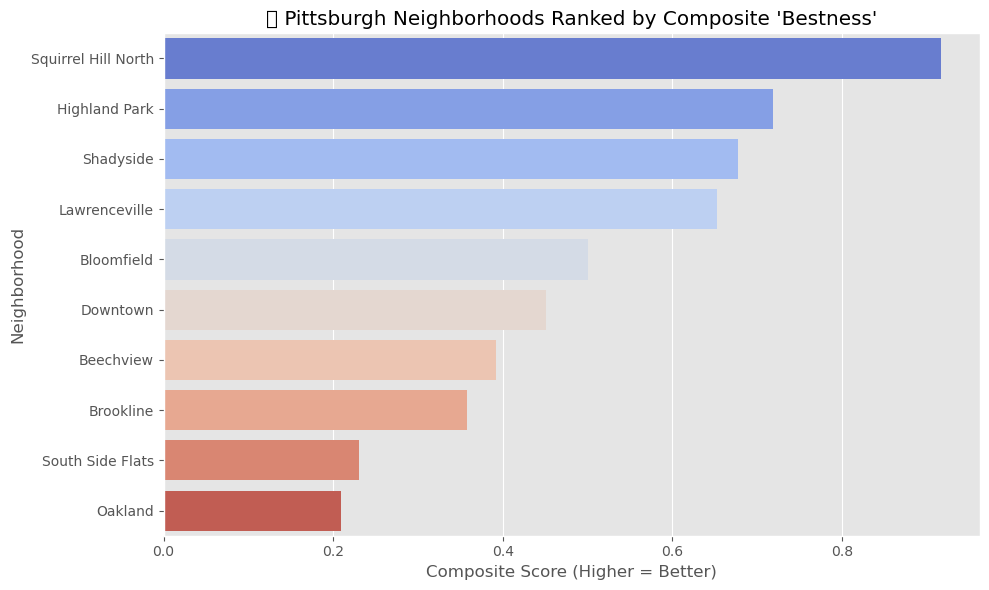

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(y="Neighborhood", x="Bestness_Score", data=ranked, palette="coolwarm")
plt.title("🏆 Pittsburgh Neighborhoods Ranked by Composite 'Bestness'")
plt.xlabel("Composite Score (Higher = Better)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

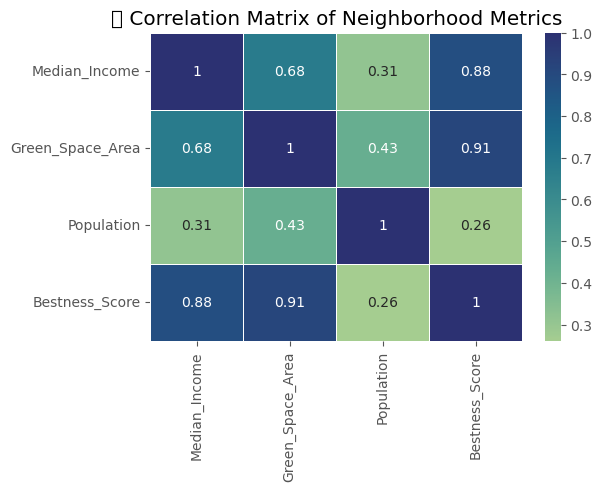

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Median_Income", "Green_Space_Area", "Population", "Bestness_Score"]].corr(),
            annot=True, cmap="crest", linewidths=0.5)
plt.title("📈 Correlation Matrix of Neighborhood Metrics")
plt.show()

In [41]:
best = ranked.iloc[0]["Neighborhood"]
score = ranked.iloc[0]["Bestness_Score"]

print(f"🌟 According to our data-driven metric, "
      f"the best neighborhood in Pittsburgh is **{best}**, "
      f"with a Bestness Score of {score:.2f}.")

🌟 According to our data-driven metric, the best neighborhood in Pittsburgh is **Squirrel Hill North**, with a Bestness Score of 0.92.


In [46]:
print("""
🧠 Reflection:
In this analysis, we defined 'bestness' using three quantitative factors:
• Population balance (neither overcrowded nor sparse)
• Median household income
• Amount of green space

By focusing on livability metrics instead of crime or housing,
we provide a complementary perspective for our team’s overall analysis. """)


🧠 Reflection:
In this analysis, we defined 'bestness' using three quantitative factors:
• Population balance (neither overcrowded nor sparse)
• Median household income
• Amount of green space

By focusing on livability metrics instead of crime or housing,
we provide a complementary perspective for our team’s overall analysis. 
